In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | verkhnyaya inta
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | wuan
Processing Record 11 of Set 1 | necochea
Processing Record 12 of Set 1 | danville
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | harper
Processing Record 15 of Set 1 | umm durman
City not found. Skipping...
Processing Record 16 of Set 1 | havoysund
Processing Record 17 of Set 1 | dongsheng
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | poitiers
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | nome
Processing Record 23 of Set 1 

Processing Record 35 of Set 4 | sabang
Processing Record 36 of Set 4 | ugoofaaru
Processing Record 37 of Set 4 | homer
Processing Record 38 of Set 4 | arraial do cabo
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | shache
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | rafraf
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | honningsvag
Processing Record 49 of Set 4 | manaure
Processing Record 50 of Set 4 | alice springs
Processing Record 1 of Set 5 | paramirim
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | qasigiannguit
Pro

Processing Record 29 of Set 8 | nehe
Processing Record 30 of Set 8 | axim
Processing Record 31 of Set 8 | wahran
City not found. Skipping...
Processing Record 32 of Set 8 | semnan
Processing Record 33 of Set 8 | thinadhoo
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | verkhovazhye
Processing Record 36 of Set 8 | pennagaram
Processing Record 37 of Set 8 | dibulla
Processing Record 38 of Set 8 | tigzirt
Processing Record 39 of Set 8 | stolin
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | saint-francois
Processing Record 42 of Set 8 | pandan
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | ihosy
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | manavalakurichi
Processing Record 47 of Set 8 | omsukchan
Processing Record 48 of Set 8 | meridian
Processing Record 49 of Set 8 | valparaiso
Processing Record 50 of Set 8 | santa cruz
Processing Record 1 of Set 9 | ngukurr
City not found. Skip

Processing Record 16 of Set 12 | new agutaya
Processing Record 17 of Set 12 | havre-saint-pierre
Processing Record 18 of Set 12 | balykshi
Processing Record 19 of Set 12 | verenchanka
Processing Record 20 of Set 12 | alofi
Processing Record 21 of Set 12 | maiduguri
Processing Record 22 of Set 12 | halifax
Processing Record 23 of Set 12 | hambantota
Processing Record 24 of Set 12 | bell ville
Processing Record 25 of Set 12 | bairiki
Processing Record 26 of Set 12 | dakar
Processing Record 27 of Set 12 | acarau
Processing Record 28 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 29 of Set 12 | rio gallegos
Processing Record 30 of Set 12 | raudeberg
Processing Record 31 of Set 12 | victor harbor
Processing Record 32 of Set 12 | kamina
Processing Record 33 of Set 12 | abu kamal
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | luanda
Processing Record 36 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 37 o

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,78.48,56,0,11.32,UY,2022-01-15 00:35:15
1,Verkhnyaya Inta,65.9811,60.3094,8.56,83,100,7.74,RU,2022-01-15 00:35:16
2,Busselton,-33.6500,115.3333,72.05,60,43,4.81,AU,2022-01-15 00:35:16
3,Hilo,19.7297,-155.0900,78.80,67,0,11.50,US,2022-01-15 00:32:54
4,Mataura,-46.1927,168.8643,68.49,34,13,1.61,NZ,2022-01-15 00:35:17
5,Dikson,73.5069,80.5464,12.90,90,100,22.66,RU,2022-01-15 00:35:17
6,Vaini,-21.2000,-175.2000,87.96,84,40,14.97,TO,2022-01-15 00:35:17
7,Hamilton,39.1834,-84.5333,35.24,81,100,1.99,US,2022-01-15 00:33:20
8,Port Alfred,-33.5906,26.8910,74.44,84,77,23.67,ZA,2022-01-15 00:35:18
9,Wuan,31.6836,112.0044,38.53,76,9,2.39,CN,2022-01-15 00:35:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-01-15 00:35:15,-33.6971,-53.4616,78.48,56,0,11.32
1,Verkhnyaya Inta,RU,2022-01-15 00:35:16,65.9811,60.3094,8.56,83,100,7.74
2,Busselton,AU,2022-01-15 00:35:16,-33.6500,115.3333,72.05,60,43,4.81
3,Hilo,US,2022-01-15 00:32:54,19.7297,-155.0900,78.80,67,0,11.50
4,Mataura,NZ,2022-01-15 00:35:17,-46.1927,168.8643,68.49,34,13,1.61
5,Dikson,RU,2022-01-15 00:35:17,73.5069,80.5464,12.90,90,100,22.66
6,Vaini,TO,2022-01-15 00:35:17,-21.2000,-175.2000,87.96,84,40,14.97
7,Hamilton,US,2022-01-15 00:33:20,39.1834,-84.5333,35.24,81,100,1.99
8,Port Alfred,ZA,2022-01-15 00:35:18,-33.5906,26.8910,74.44,84,77,23.67
9,Wuan,CN,2022-01-15 00:35:18,31.6836,112.0044,38.53,76,9,2.39


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

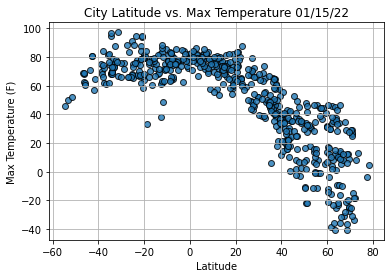

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

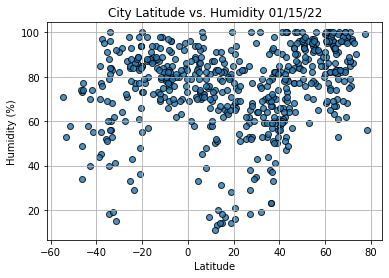

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

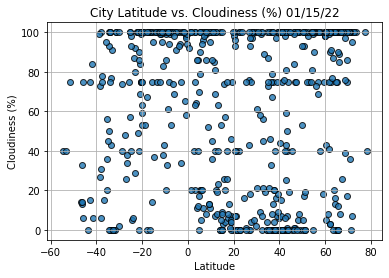

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()